In [1]:
#Social_Network_Ads.csv

**Import libraries**

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Importing the dataset**

In [3]:
df=pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.drop(columns=['User ID','Gender'],inplace=True)

**Splitting the dataset into the Training set and Test set**

In [5]:
X=df.iloc[:,:-1].values
y=df['Purchased'].values

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=5)

**Feature Scaling**

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

(400, 3)

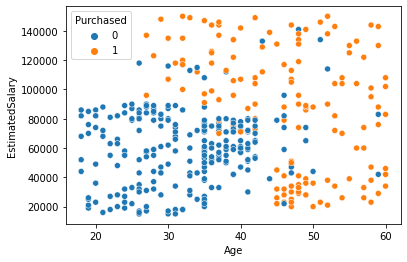

In [8]:
sns.scatterplot(data=df, x="Age", y="EstimatedSalary",hue='Purchased')
df.shape

**Fitting SVM to the Training set**

In [9]:
from sklearn.svm import SVC
svcl=SVC(kernel='linear')
svcl.fit(X_train,y_train)

SVC(kernel='linear')

**Predicting the Test set results**

In [10]:
y_pred=svcl.predict(X_test)
svcl.score(X_test,y_test)

0.85

**Making the Confusion Matrix**

[[47  6]
 [ 6 21]]


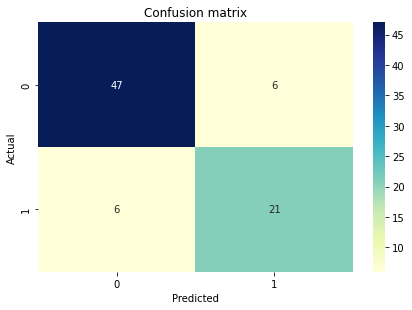

In [11]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, svcl.predict(X_test))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
print(cnf_matrix)

**Visualising the Training set results**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


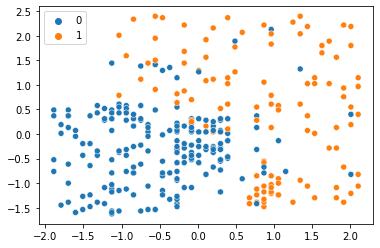

In [12]:
sns.scatterplot(X_train[:,0],X_train[:,1],y_train)

**Visualising the Test set results**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


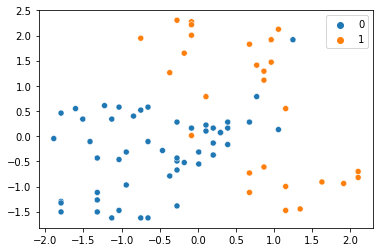

In [13]:
sns.scatterplot(X_test[:,0],X_test[:,1],hue=y_test)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


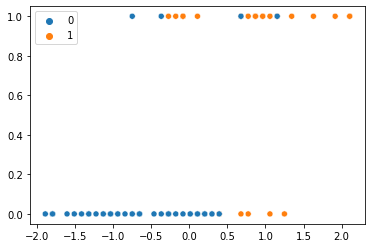

In [14]:
sns.scatterplot(X_test[:,0],y_test,hue=y_pred)